In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.naive_bayes import GaussianNB

import warnings # supress warnings
warnings.filterwarnings('ignore')

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
quality,1.000000,-0.545413,-0.113635,0.416883,0.114899,-0.204539,-0.360188,-0.540767,0.056017,0.053831,-0.116169,-0.044930,-0.182717,-0.219995,-0.207452,-0.225345,-0.003249,-0.241318,-0.232808,-0.032791,-0.050053,-0.135806,0.012112,-0.016504,0.205591,0.232815,-0.124352
bits,-0.545413,1.000000,0.306002,-0.453138,-0.239367,0.311634,0.488148,0.984354,-0.241548,-0.238926,-0.214985,0.095957,0.611313,0.652255,0.641015,0.657708,0.212510,0.762573,0.772060,0.466553,0.027610,0.154453,0.002760,0.112617,0.221070,0.226213,-0.035233
intra_parts,-0.113635,0.306002,1.000000,-0.232016,-0.296409,-0.163465,-0.257123,0.261256,0.129057,0.131399,0.090451,0.042349,0.304228,0.353492,0.312531,0.359115,0.118444,0.403921,0.396601,0.227384,-0.007550,-0.193197,0.053701,0.041361,0.111185,0.111301,-0.147224
skip_parts,0.416883,-0.453138,-0.232016,1.000000,-0.193158,-0.282695,-0.459436,-0.415506,0.226022,0.224180,0.151560,-0.042033,-0.301984,-0.339421,-0.313843,-0.325924,-0.105880,-0.394196,-0.394705,-0.197624,-0.162952,-0.340346,-0.062014,-0.063737,-0.137173,-0.170583,-0.053407
inter_16x16_parts,0.114899,-0.239367,-0.296409,-0.193158,1.000000,-0.189000,-0.328092,-0.226507,0.005923,0.005145,0.024715,-0.036344,-0.130272,-0.151854,-0.165775,-0.182336,-0.033423,-0.196816,-0.205475,-0.078323,0.129045,0.226427,0.039510,-0.014222,-0.048501,-0.042690,0.060848
inter_4x4_parts,-0.204539,0.311634,-0.163465,-0.282695,-0.189000,1.000000,0.471594,0.301041,-0.189158,-0.189183,-0.154228,0.022195,0.149144,0.162887,0.177710,0.184549,0.054969,0.222911,0.233087,0.125769,-0.046685,0.059086,-0.048357,0.010975,0.060257,0.082681,0.089872
inter_other_parts,-0.360188,0.488148,-0.257123,-0.459436,-0.328092,0.471594,1.000000,0.463156,-0.349363,-0.349120,-0.270942,0.039465,0.223093,0.237557,0.253014,0.236161,0.058523,0.310651,0.331114,0.152109,0.013625,0.240638,-0.031232,0.041019,0.118267,0.146802,0.135077
non_zero_pixels,-0.540767,0.984354,0.261256,-0.415506,-0.226507,0.301041,0.463156,1.000000,-0.238027,-0.235694,-0.212436,0.089941,0.583268,0.628541,0.617369,0.638268,0.189319,0.729676,0.737542,0.428417,0.011962,0.144081,-0.008987,0.098812,0.191935,0.195442,-0.023153
frame_width,0.056017,-0.241548,0.129057,0.226022,0.005923,-0.189158,-0.349363,-0.238027,1.000000,0.999963,0.920407,-0.021442,-0.171299,-0.104499,-0.163332,-0.114250,-0.098814,-0.154961,-0.177697,-0.179415,0.287141,-0.079080,0.154337,0.032368,-0.329236,-0.351129,-0.124877
frame_height,0.053831,-0.238926,0.131399,0.224180,0.005145,-0.189183,-0.349120,-0.235694,0.999963,1.000000,0.918763,-0.020927,-0.169505,-0.102086,-0.161058,-0.111565,-0.098399,-0.152722,-0.175317,-0.178752,0.286553,-0.081135,0.153965,0.032694,-0.326511,-0.348618,-0.130123


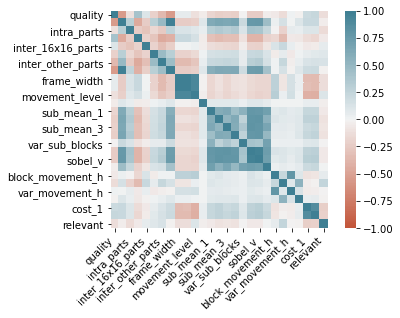

In [2]:
#Read the dataSet
df = pd.read_csv('prueba.csv')
np.random.seed(8)

corrMatrix = df.corr()
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

corrMatrix.style.background_gradient(cmap='coolwarm')

In [4]:
print(df['relevant'].value_counts())

1    6219
0    4391
Name: relevant, dtype: int64


In [5]:
#There is null values in sub_mean_3
df.pop('block_movement_h')
df.pop('block_movement_v')
df.pop('var_movement_h')
df.pop('var_movement_v')
df.pop('cost_1')
df.pop('cost_2')
df.pop('inter_16x16_parts')
df.pop('movement_level')
df.pop('mean')
df.pop('var_sub_blocks')
print(df)
print(df.isnull().any())
print(np.any(np.isnan(df))) 
print(np.all(np.isfinite(df)))

       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
10605       32   668            0           0                3   
10606       32   147            0           1                0   
10607       32   582            0           0                0   
10608       32   241            0           1                0   
10609       32    33            0           1                0   

       inter_other_parts  non_zero_pixels  frame_width  frame_height  \
0                     21              404          416           240   
1                      8              381          416         

In [6]:
cat_mask = (df.dtypes==object)
cat_cols = df.columns[cat_mask].tolist()
df_cat = df[cat_cols]
df_num = df.drop(cat_cols,axis=1)
#There is not categorical variables
print(df_cat)
print(df_num)
print(np.any(np.isnan(df_num))) 
print(np.all(np.isfinite(df_num)))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[10610 rows x 0 columns]
       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
10605       32   668            0           0                3   
10606       32 

In [7]:
imp_num = SimpleImputer(strategy='mean')
columns = df_num.columns
index = df_num.index
df_num = pd.DataFrame(imp_num.fit_transform(df_num),columns=columns,index=index)
df_preprocessed=df_num
df_preprocessed=df_preprocessed.astype(int)
print(df_preprocessed.astype(int))
print(df_preprocessed.isnull().any())
print(np.any(np.isnan(df_preprocessed))) 
print(np.all(np.isfinite(df_preprocessed)))

       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
10605       32   668            0           0                3   
10606       32   147            0           1                0   
10607       32   582            0           0                0   
10608       32   241            0           1                0   
10609       32    33            0           1                0   

       inter_other_parts  non_zero_pixels  frame_width  frame_height  \
0                     21              404          416           240   
1                      8              381          416         

In [8]:
df_columns=df_preprocessed.columns
mms = MinMaxScaler()
df_preprocessed = mms.fit_transform(df_preprocessed)
df_preprocessed=pd.DataFrame(df_preprocessed)
df.columns=df_columns
print(df_preprocessed)

             0         1    2     3         4         5         6         7   \
0      0.000000  0.449172  0.0  0.00  0.090909  0.777778  0.487923  0.000000   
1      0.000000  0.363655  0.0  0.50  0.090909  0.296296  0.460145  0.000000   
2      0.000000  0.413121  0.0  0.00  0.000000  0.296296  0.555556  0.000000   
3      0.000000  0.518340  0.0  0.00  0.545455  0.740741  0.508454  0.000000   
4      0.000000  0.229092  0.0  0.00  0.090909  0.296296  0.201691  0.000000   
...         ...       ...  ...   ...       ...       ...       ...       ...   
10605  0.666667  0.140013  0.0  0.00  0.090909  0.444444  0.129227  0.276596   
10606  0.666667  0.030811  0.0  0.25  0.000000  0.148148  0.019324  0.276596   
10607  0.666667  0.121987  0.0  0.00  0.000000  0.481481  0.111111  0.276596   
10608  0.666667  0.050514  0.0  0.25  0.000000  0.074074  0.043478  0.276596   
10609  0.666667  0.006917  0.0  0.25  0.000000  0.000000  0.000000  0.276596   

             8       9         10      

In [11]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3)

In [12]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3)

In [13]:
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3)

In [14]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3)

In [15]:
reg = LinearRegression().fit(x_train_lr, y_train_lr)
count=0
prediction=reg.predict(x_test_lr)
y_test_array=y_test_lr.to_numpy()
for i in range(len(prediction)):
    prediction[i]=int(prediction[i])
    if(prediction[i] == y_test_array[i]):
       count=count+1

print(reg.score(x_train_lr, y_train_lr))

1.0


In [16]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_rf,y_train_rf)
count_rf=0
y_pred_rf= rf.predict(x_test_rf)
y_test_array_rf=y_test_rf.to_numpy()
for i in range(len(y_pred_rf)):
    y_pred_rf[i]=int(y_pred_rf[i])
    if(y_pred_rf[i] == y_test_array_rf[i]):
       count_rf=count_rf+1
print(count_rf/len(y_pred_rf))
conf_rf = pd.DataFrame(
    confusion_matrix(y_test_rf,y_pred_rf),
    columns=['Prediction 0', 'Prediction 1'],
    index=['True 0', 'True 1']
)
print(conf_rf)
print()

1.0
        Prediction 0  Prediction 1
True 0          1301             0
True 1             0          1882



In [17]:
print(classification_report(y_test_lr,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.40      0.40      0.40      1306
         1.0       0.58      0.58      0.58      1877

    accuracy                           0.51      3183
   macro avg       0.49      0.49      0.49      3183
weighted avg       0.51      0.51      0.51      3183



In [18]:
nb=GaussianNB()
nb.fit(x_train_nb, y_train_nb)
count_nb=0
y_pred_nb_gaussian=nb.predict(x_test_nb)
y_test_array_nb=y_test_nb.to_numpy()
for i in range(len(y_pred_nb_gaussian)):
    y_pred_nb_gaussian[i]=int(y_pred_nb_gaussian[i])
    if(y_pred_nb_gaussian[i] == y_test_array_nb[i]):
       count_nb=count_nb+1
print(count_nb/len(y_pred_nb_gaussian))
conf_nb=pd.DataFrame(
    confusion_matrix(y_test_nb,y_pred_nb_gaussian),
    columns = ['Predicted 0', 'Prediction 1'],
    index = ['True 0', 'True 1']
)
print(conf_nb)
print()
print(classification_report(y_test_nb,y_pred_nb_gaussian))
print()

1.0
        Predicted 0  Prediction 1
True 0         1309             0
True 1            0          1874

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1309
         1.0       1.00      1.00      1.00      1874

    accuracy                           1.00      3183
   macro avg       1.00      1.00      1.00      3183
weighted avg       1.00      1.00      1.00      3183


